<a href="https://colab.research.google.com/github/MevinuAbey/Kaggle/blob/main/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kaggle Titanc ML Competition Model**
*by Mevinu*


---



# THE PLAN


1.   Import Dataset from github -> view data
2.   data cleaning & preprocessing
3.   split training data into two parts
4.   create the model
5.   train
6.   make the predection



---
# Import required library's

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

---
#Import Dataset From Github

In [2]:
train_data_url = "https://raw.githubusercontent.com/MevinuAbey/Kaggle/refs/heads/main/titanic/titanic_data/train.csv"
train_data = pd.read_csv(train_data_url)

test_data_url = "https://raw.githubusercontent.com/MevinuAbey/Kaggle/refs/heads/main/titanic/titanic_data/test.csv"
test_data = pd.read_csv(test_data_url)

*view data*

In [3]:
print("train data")
train_data.head()

train data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("test data")
test_data.head()

test data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


---
#Data Cleaning & preprocessing

by looking at above oututs its clear what we need to remove from training dataset and test dataset

from training dataset
*   PassengerId
*   Name
*   Ticket
*   cabin

from testing dataset
*   cabin
*   Name
*   Ticket


In [5]:
train_data_filterd = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
display(train_data_filterd.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
test_data_filterd = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
display(test_data_filterd.head())

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [7]:
#####################################################################################################################

one hot encoding 'sex' and 'Embarked' in training dataset becouse sequential model can only procces numbers

In [8]:
train_data_filterd = pd.get_dummies(train_data_filterd, columns=['Sex'], drop_first=True)
train_data_filterd = pd.get_dummies(train_data_filterd, columns=['Embarked'], drop_first=True)

display(train_data_filterd.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


we have to the the same to test dataset as well one hot encoding 'sex' and 'embarked'

In [9]:
test_data_filterd = pd.get_dummies(test_data_filterd, columns=['Sex'], drop_first=True)
test_data_filterd = pd.get_dummies(test_data_filterd, columns=['Embarked'], drop_first=True)

display(test_data_filterd.head())

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,True,True,False
1,893,3,47.0,1,0,7.0000,False,False,True
2,894,2,62.0,0,0,9.6875,True,True,False
3,895,3,27.0,0,0,8.6625,True,False,True
4,896,3,22.0,1,1,12.2875,False,False,True


In [10]:
#####################################################################################################################

alright now we have to fill the missing values or corrupted values from trining dataset

In [11]:
#finding the missing values

print("\nmissing values from train Data")
display(train_data_filterd.isnull().sum()) #finding if there are empty values in trining data

print("\nmissing values from Test Data")
display(test_data_filterd.isnull().sum()) #finding if there are empty values in trining data


missing values from train Data


,0
Survived,0
Pclass,0
Age,177
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0



missing values from Test Data


,0
PassengerId,0
Pclass,0
Age,86
SibSp,0
Parch,0
Fare,1
Sex_male,0
Embarked_Q,0
Embarked_S,0


fixing train set

In [12]:
#in training dataset
# so as output shows there are 177 empty values in age ###(and 2 empty Embarked values if we did not one hot encode before finding missing values)
#we can fix the valus by taking avarage value from avalble valus and applying it to missing valus

# Fill missing Age values with the mean age
train_data_filterd['Age'] = train_data_filterd['Age'].fillna(train_data_filterd['Age'].mean())

# Verify that there are no more missing values
display(train_data_filterd.isnull().sum())

,0
Survived,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0


fixing test set

In [13]:
#in test dataset
# so as output shows there are 86 empty values in age and 1 empty fare value
#we can fix the valus by taking avarage value from avalble valus and applying it to missing valus

# Fill missing Age values with the mean age
test_data_filterd['Age'] = test_data_filterd['Age'].fillna(test_data_filterd['Age'].mean())

# Fill missing Fare values with the mean fare
test_data_filterd['Fare'] = test_data_filterd['Fare'].fillna(test_data_filterd['Fare'].mean())

# Verify that there are no more missing values
display(test_data_filterd.isnull().sum())

,0
PassengerId,0
Pclass,0
Age,0
SibSp,0
Parch,0
Fare,0
Sex_male,0
Embarked_Q,0
Embarked_S,0


In [14]:
# Convert boolean columns to integers (0 or 1)
test_data_filterd['Sex_male'] = test_data_filterd['Sex_male'].astype(int)
test_data_filterd['Embarked_Q'] = test_data_filterd['Embarked_Q'].astype(int)
test_data_filterd['Embarked_S'] = test_data_filterd['Embarked_S'].astype(int)

train_data_filterd['Sex_male'] = train_data_filterd['Sex_male'].astype(int)
train_data_filterd['Embarked_Q'] = train_data_filterd['Embarked_Q'].astype(int)
train_data_filterd['Embarked_S'] = train_data_filterd['Embarked_S'].astype(int)

In [15]:
#####################################################################################################################

# split training data into two parts

In [16]:
#take 'Survived' out from "train_data_filterd"
# after that split "train_data_filterd" to two as trin set and validate set

In [17]:
train = train_data_filterd.drop('Survived', axis=1)
validate = train_data_filterd['Survived']

In [18]:
x_train, x_validate, y_train, y_validate = train_test_split(train, validate, test_size=0.2, random_state=42)

# create the model

In [19]:
from keras.models import Sequential , load_model
from keras.layers import Dense, Dropout , Input

In [20]:
model = Sequential()
model.add(Input(shape=(len(x_train.columns),))) # Using Input layer
model.add(Dense(units=128 , activation='relu'))
model.add(Dropout(0.2)) # Add dropout with a rate of 0.2
model.add(Dense(units=64 , activation='relu'))
model.add(Dropout(0.2)) # Add dropout with a rate of 0.2
model.add(Dense(units=1 , activation='sigmoid'))

In [21]:
model.compile(optimizer='sgd' , loss='binary_crossentropy' , metrics=['accuracy'])

In [27]:
model.fit(x_train , y_train ,validation_data=(x_validate , y_validate), epochs=100 , batch_size=32)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6836 - loss: 0.5915 - val_accuracy: 0.6872 - val_loss: 0.6095
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7055 - loss: 0.5836 - val_accuracy: 0.7263 - val_loss: 0.5563
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6780 - loss: 0.5944 - val_accuracy: 0.7318 - val_loss: 0.5602
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7167 - loss: 0.5780 - val_accuracy: 0.7095 - val_loss: 0.6123
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6655 - loss: 0.5963 - val_accuracy: 0.6872 - val_loss: 0.5980
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6984 - loss: 0.5840 - val_accuracy: 0.6927 - val_loss: 0.5733
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6777 - loss: 0.5778 - val_accuracy: 0.6983 - val_loss: 0.5658
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6689 - loss: 0.5822 - val_accuracy: 0.6704 - v

In [23]:
import matplotlib.pyplot as plt

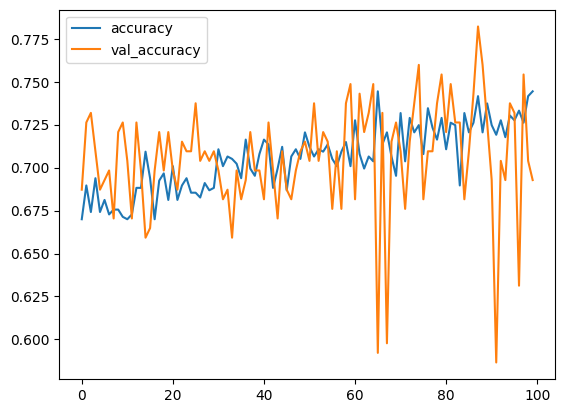

In [28]:
plt.plot(model.history.history['accuracy'] , label='accuracy')
plt.plot(model.history.history['val_accuracy'] , label='val_accuracy')
plt.legend()

In [25]:
x_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
331,1,45.5,0,0,28.5000,1,0,1
733,2,23.0,0,0,13.0000,1,0,1
382,3,32.0,0,0,7.9250,1,0,1
704,3,26.0,1,0,7.8542,1,0,1
813,3,6.0,4,2,31.2750,0,0,1


In [26]:
# Make predictions on the test data
predictions = model.predict(test_data_filterd.drop('PassengerId', axis=1))



# The model outputs probabilities, convert them to binary predictions (0 or 1)
predictions = (predictions > 0.5).astype(int)

# Create a submission DataFrame
submission = pd.DataFrame({'PassengerId': test_data_filterd['PassengerId'], 'Survived': predictions.flatten()})

# Save the submission file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Submission file created successfully!
